In [ ]:
import pandas as pd
import numpy as np



In [13]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
# Kiểm tra dữ liệu
print("Movies info:")
print(movies.info())
print(movies.head())
print("\nRatings info:")
print(ratings.info())
print(ratings.head())

Movies info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10 non-null     int64 
 1   title    10 non-null     object
 2   genres   10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes
None
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings info:
<class 'pandas.core.frame.DataF

In [6]:
# Kiểm tra missing values
print("\nMissing values in movies:\n", movies.isnull().sum())
print("Missing values in ratings:\n", ratings.isnull().sum())
# Nếu có missing, có thể xóa hoặc điền
movies.dropna(inplace=True) 
ratings.dropna(inplace=True)


Missing values in movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [7]:

# Gộp movies với ratings dựa theo movieId
movie_data = pd.merge(ratings, movies, on='movieId', how='left')
print("\nMerged DataFrame:")
print(movie_data.head())


Merged DataFrame:
   userId  movieId  rating  timestamp                    title  \
0       1        1     4.0  964982703         Toy Story (1995)   
1       1        3     4.0  964981247  Grumpier Old Men (1995)   
2       1        6     4.0  964982224              Heat (1995)   
3       1       47     5.0  964983815                      NaN   
4       1       50     5.0  964982931                      NaN   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                                          NaN  
4                                          NaN  


In [8]:

# Ví dụ: các phim có rating >= 4.5
high_rated = movie_data[movie_data['rating'] >= 4.5]
print("\nHigh-rated movies (rating >= 4.5):")
print(high_rated.head())


High-rated movies (rating >= 4.5):
   userId  movieId  rating  timestamp             title  \
3       1       47     5.0  964983815               NaN   
4       1       50     5.0  964982931               NaN   
6       1      101     5.0  964980868               NaN   
8       2        1     5.0  964982931  Toy Story (1995)   

                                        genres  
3                                          NaN  
4                                          NaN  
6                                          NaN  
8  Adventure|Animation|Children|Comedy|Fantasy  


In [14]:

#  Thống kê dữ liệu

all_genres = movies['genres'].str.get_dummies(sep='|')
genre_count = all_genres.sum().sort_values(ascending=False)
print("\nSố lượng phim theo thể loại:")
print(genre_count)
# Rating trung bình theo phim
avg_rating = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("\nTop 10 movies by average rating:")
print(avg_rating.head(10))


Số lượng phim theo thể loại:
Comedy       5
Adventure    4
Action       3
Children     3
Romance      3
Fantasy      2
Thriller     2
Animation    1
Crime        1
Drama        1
dtype: int64

Top 10 movies by average rating:
title
Toy Story (1995)                      4.5
Father of the Bride Part II (1995)    4.0
Grumpier Old Men (1995)               4.0
Heat (1995)                           4.0
Jumanji (1995)                        3.0
Waiting to Exhale (1995)              2.0
Name: rating, dtype: float64


In [15]:
#  Parsing Timestamps

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month

print("\nRatings with parsed timestamp:")
print(ratings.head())


Ratings with parsed timestamp:
   userId  movieId  rating           timestamp  year  month
0       1        1     4.0 2000-07-30 18:45:03  2000      7
1       1        3     4.0 2000-07-30 18:20:47  2000      7
2       1        6     4.0 2000-07-30 18:37:04  2000      7
3       1       47     5.0 2000-07-30 19:03:35  2000      7
4       1       50     5.0 2000-07-30 18:48:51  2000      7


In [22]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\thaon\AppData\Local\Temp\ipykernel_17192\120944628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index[:10], y=genre_count.values[:10], palette='viridis')


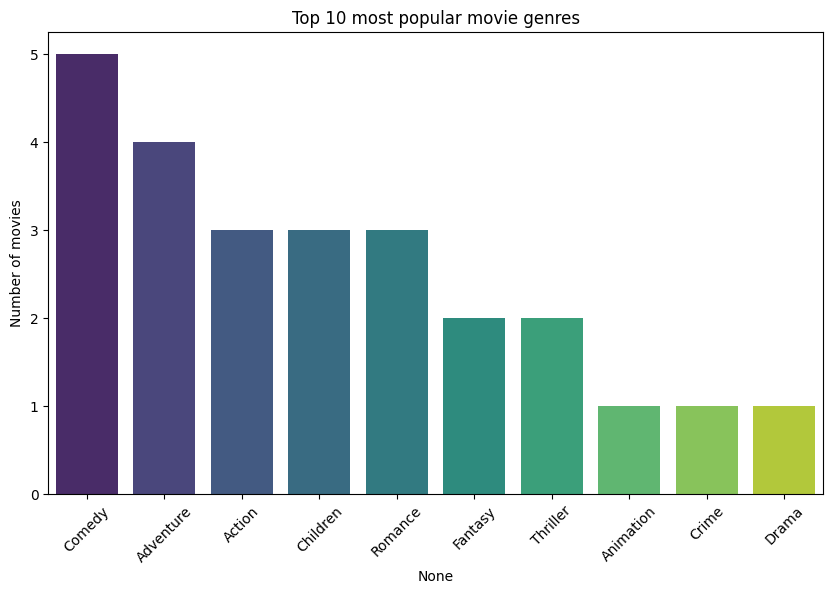

In [24]:

#  Trực quan hóa dữ liệu
# top 10 loại phổ biến
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.index[:10], y=genre_count.values[:10], palette='viridis')
plt.title("Top 10 most popular movie genres")
plt.xticks(rotation=45)
plt.ylabel("Number of movies")
plt.show()

C:\Users\thaon\AppData\Local\Temp\ipykernel_17192\3763355684.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_avg.index, y=top10_avg.values, palette='magma')


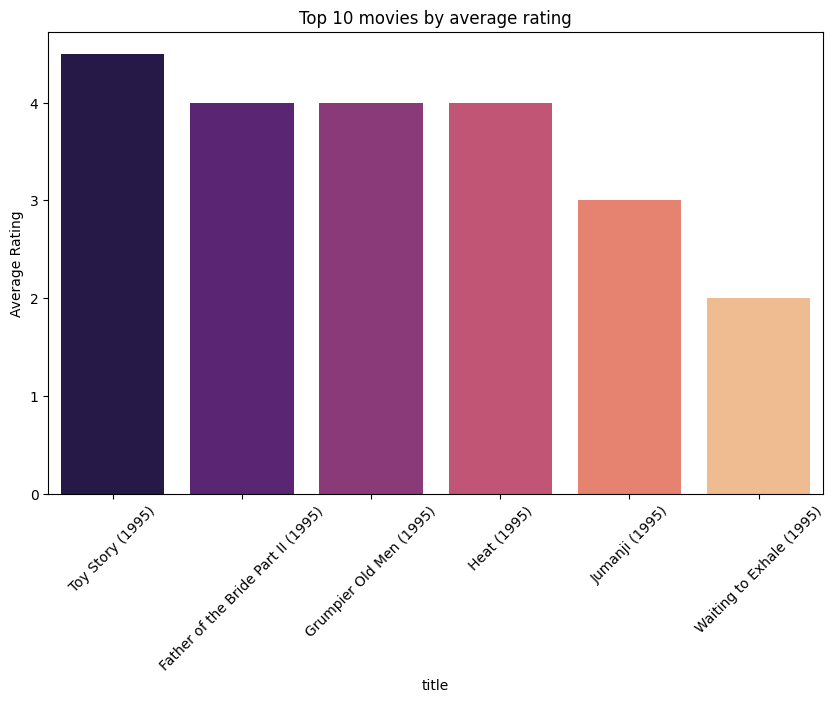

In [25]:
# Rating trung bình của các phim

top10_avg = avg_rating.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_avg.index, y=top10_avg.values, palette='magma')
plt.title("Top 10 movies by average rating")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.show()

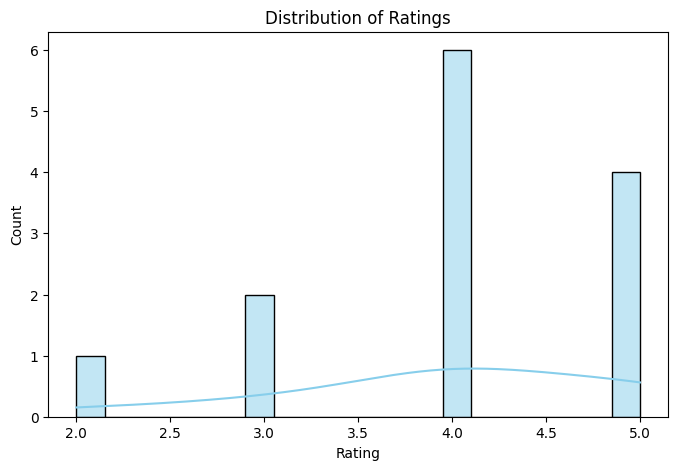

In [26]:

# Phân bố rating

plt.figure(figsize=(8,5))
sns.histplot(movie_data['rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()

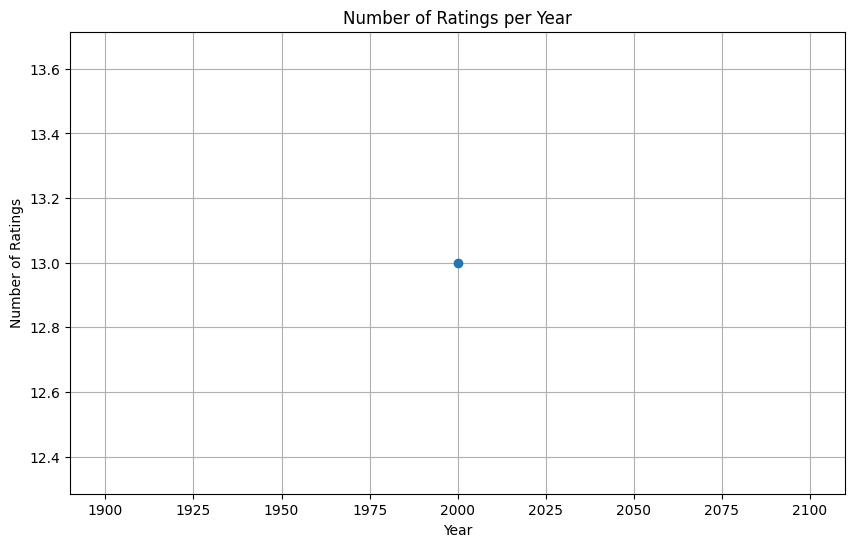

In [27]:
# Số lượng rating theo năm

plt.figure(figsize=(10,6))
ratings.groupby('year').size().plot(kind='line', marker='o')
plt.title("Number of Ratings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.show()